In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
df = pd.read_csv('s41598-020-73558-3_sepsis_survival_primary_cohort.csv')

In [97]:
df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [99]:
#Check for null values
df.isna().sum()

age_years                        0
sex_0male_1female                0
episode_number                   0
hospital_outcome_1alive_0dead    0
dtype: int64

In [100]:
df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [101]:
#Renaming columns to look better
sep = df.rename(columns={"age_years": "Age", "sex_0male_1female": "Sex","episode_number":"Episode Number","hospital_outcome_1alive_0dead":"Status"})

In [102]:
sep

,Age,Sex,Episode Number,Status
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
...,...,...,...,...
110199,0,0,1,1
110200,0,1,1,1
110201,70,1,1,1
110202,0,0,1,1


In [103]:
#Spliting data
X = sep.iloc[:,:3].values

In [104]:
y = sep.iloc[:,-1].values

In [105]:
X.shape

(110204, 3)

In [106]:
y.shape

(110204,)

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [111]:
X_train.shape

(77142, 3)

In [112]:
X_test.shape
#y_test = np.reshape(y_train,(-1,1))

(33062, 3)

In [113]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [114]:
knn = KNeighborsClassifier(n_neighbors=3)

In [116]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [119]:
y_pred = knn.predict(X_test)

C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [120]:
accuracy_score(y_test,y_pred)

0.9145242272094852

In [126]:
#Our model is good, lets see if we can find a better k number
accuracy=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))

C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\RaloP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

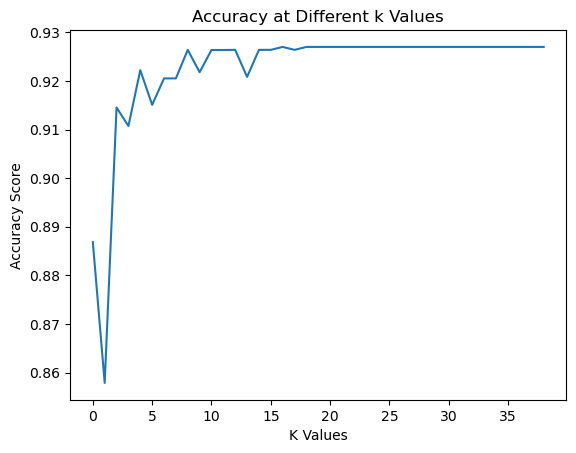

In [127]:
plt.plot(accuracy)
plt.title("Accuracy at Different k Values")
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")
plt.show()

In [125]:
#We can around the 19th mark accuracy score stagnates

[0.8868489504567176,
 0.8578730869275906,
 0.9145242272094852,
 0.9107132054927106,
 0.922206763051237,
 0.9150686588833101,
 0.9205129756215595,
 0.9205129756215595,
 0.9263807392172282,
 0.9217833161938177,
 0.9263504930131269,
 0.9263504930131269,
 0.9263807392172282,
 0.9208154376625733,
 0.9263807392172282,
 0.9263807392172282,
 0.9269856632992559,
 0.9263807392172282,
 0.9269856632992559,
 0.9269856632992559,
 0.9269856632992559,
 0.9269856632992559,
 0.9269856632992559,
 0.9269856632992559,
 0.9269856632992559]